In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statistics
import math

In [2]:
dataframe = pd.read_csv("Linear_regression.csv",
                sep = ';',
                engine = 'python')
dataframe

,Residents,Books_expenses
0,19,650
1,21,650
2,26,750
3,24,660
4,32,890
5,11,350
6,30,880
7,17,620
8,25,800
9,34,970


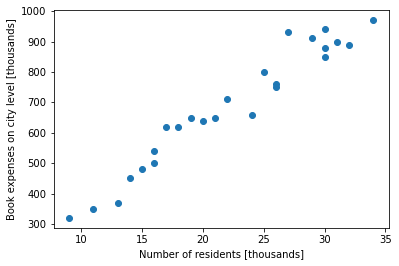

In [3]:
%matplotlib inline
plt.xlabel('Number of residents [thousands]')
plt.ylabel('Book expenses on city level [thousands]')
plt.scatter(dataframe.Residents,dataframe.Books_expenses)

In [4]:
df1 = dataframe.drop('Books_expenses',axis='columns')
x = df1.Residents
df2 = dataframe.drop('Residents',axis='columns')
y = df2.Books_expenses
x,y

(0     19
 1     21
 2     26
 3     24
 4     32
 5     11
 6     30
 7     17
 8     25
 9     34
 10    16
 11    20
 12    18
 13    27
 14    13
 15    16
 16    30
 17    29
 18    14
 19    31
 20    30
 21     9
 22    15
 23    22
 24    26
 Name: Residents, dtype: int64,
 0     650
 1     650
 2     750
 3     660
 4     890
 5     350
 6     880
 7     620
 8     800
 9     970
 10    500
 11    640
 12    620
 13    930
 14    370
 15    540
 16    940
 17    910
 18    450
 19    900
 20    850
 21    320
 22    480
 23    710
 24    760
 Name: Books_expenses, dtype: int64)

In [5]:
regression = linear_model.LinearRegression()
regression.fit(df1, df2)

LinearRegression()

In [6]:
regression.coef_

array([[26.76725522]])

In [7]:
regression.intercept_

array([91.36693419])

In [8]:
regression.predict([[12]])

array([[412.57399679]])

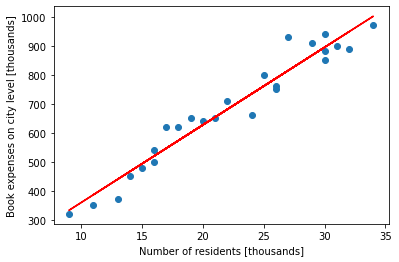

In [9]:
yhat = regression.predict(df1)
plt.xlabel('Number of residents [thousands]')
plt.ylabel('Book expenses on city level [thousands]')
plt.scatter(dataframe.Residents,dataframe.Books_expenses)
plt.plot(df1, yhat, color='red')

In [10]:
class model_fit:
    def residual_variance (self):
        yhat = []
        k = len(y)
        n = 2
        for i in x:
            yhat.append((int(np.round(regression.predict([[i]]),0))))
        epsilon = np.sum(np.square(y - yhat))
        variance = epsilon/(k-n)
        self.deviation = math.sqrt(variance)
        return ("Residual variance is equal to: {0}".format(variance), 
            "Resudial deviation is equal to: {0}".format(self.deviation))
    def coefficient_of_determination (self):
        ymean = sum(y)/len(y)
        epsilon1 = 0 
        epsilon2 = 0
        for i in y,yhat:
            epsilon1 = np.sum(np.square(yhat-ymean))
            epsilon2 = np.sum(np.square(y-ymean))
            coef = epsilon1/epsilon2
            coef_of_nondetermination = 1 - coef
        return ("Coefficient of determination is equal to: {0}".format(coef),
                "Coefficent od nondetermination: {0}".format(coef_of_nondetermination))
    def coefficient_of_residual_variation (self):
        self.residual_variance()
        ymean = sum(y)/len(y)
        Ve = (self.deviation/ymean)*100
        return ("coefficient of residual variation is equal to: {0}".format(Ve))
mf = model_fit()
print(mf.residual_variance(), mf.coefficient_of_determination (), mf.coefficient_of_residual_variation ())

('Residual variance is equal to: 2261.6521739130435', 'Resudial deviation is equal to: 47.556830991068395') ('Coefficient of determination is equal to: 0.9448839731621388', 'Coefficent od nondetermination: 0.05511602683786121') coefficient of residual variation is equal to: 6.936527274076488
